In [2]:
!pip install matplotlib opencv-python-headless

In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Input, ZeroPadding2D
from tensorflow.keras.layers import BatchNormalization, LeakyReLU, Activation, Cropping2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
import cv2

(28, 28)


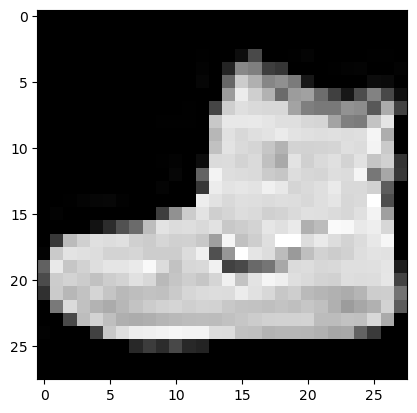

In [4]:

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print(x_train[0].shape)

plt.imshow(x_train[0], cmap="gray")

In [5]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [6]:
input_layer = Input(shape=(28, 28, 1))


zero_pad = ZeroPadding2D((2, 2))(input_layer)

conv1 = Conv2D(16, (3, 3), activation='relu', padding='same')(zero_pad)
pool1 = MaxPooling2D((2, 2), padding='same')(conv1)

conv2 = Conv2D(16, (3, 3), activation='relu', padding='same')(pool1)
pool2 = MaxPooling2D((2, 2), padding='same')(conv2)

conv3 = Conv2D(8, (3, 3), activation='relu', padding='same')(pool2)
pool3 = MaxPooling2D((2, 2), padding='same')(conv3)

conv4 = Conv2D(8, (3, 3), activation='relu', padding='same')(pool3)

encoder = MaxPooling2D((2, 2), padding='same')(conv4)

In [7]:
conv_1 = Conv2D(8, (3, 3), activation='relu', padding='same')(encoder)
upsample1 = UpSampling2D((2, 2))(conv_1)

conv_2 = Conv2D(8, (3, 3), activation='relu', padding='same')(upsample1)
upsample2 = UpSampling2D((2, 2))(conv_2)

conv_3 = Conv2D(16, (3, 3), activation='relu', padding='same')(upsample2)
upsample3 = UpSampling2D((2, 2))(conv_3)

conv_4 = Conv2D(1, (3, 3), activation='relu', padding='same')(upsample3)
upsample4 = UpSampling2D((2, 2))(conv_4)

decoder = Cropping2D((2, 2))(upsample4)

In [8]:

autoencoder = Model(input_layer, decoder)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 zero_padding2d (ZeroPadding  (None, 32, 32, 1)        0         
 2D)                                                             
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 16)         0     

In [9]:

from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import ReduceLROnPlateau

tensorboad_results = TensorBoard(log_dir='autoencoder_logs_fashion/')

checkpoint = ModelCheckpoint("best_model_fashion.h5", monitor="val_loss", save_best_only=True)

early_stop = EarlyStopping(monitor="val_loss", patience=8, restore_best_weights=False)

reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=4, min_lr=0.000001)

In [10]:

autoencoder.fit(x_train, x_train,
                epochs=70,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[checkpoint, early_stop, tensorboad_results, reduce_lr])

Epoch 1/70
469/469 [==============================] - 57s 110ms/step - loss: 0.0479 - val_loss: 0.0325 - lr: 0.0010
Epoch 2/70
469/469 [==============================] - 52s 110ms/step - loss: 0.0311 - val_loss: 0.0299 - lr: 0.0010
Epoch 3/70
469/469 [==============================] - 51s 109ms/step - loss: 0.0294 - val_loss: 0.0290 - lr: 0.0010
Epoch 4/70
469/469 [==============================] - 50s 107ms/step - loss: 0.0287 - val_loss: 0.0283 - lr: 0.0010
Epoch 5/70
469/469 [==============================] - 49s 105ms/step - loss: 0.0282 - val_loss: 0.0281 - lr: 0.0010
Epoch 6/70
469/469 [==============================] - 50s 106ms/step - loss: 0.0277 - val_loss: 0.0277 - lr: 0.0010
Epoch 7/70
469/469 [==============================] - 52s 112ms/step - loss: 0.0274 - val_loss: 0.0272 - lr: 0.0010
Epoch 8/70
469/469 [==============================] - 55s 116ms/step - loss: 0.0271 - val_loss: 0.0269 - lr: 0.0010
Epoch 9/70
469/469 [==============================] - 51s 109ms/step - l

469/469 [==============================] - 41s 87ms/step - loss: 0.0239 - val_loss: 0.0239 - lr: 1.0000e-06


313/313 [==============================] - 4s 11ms/step


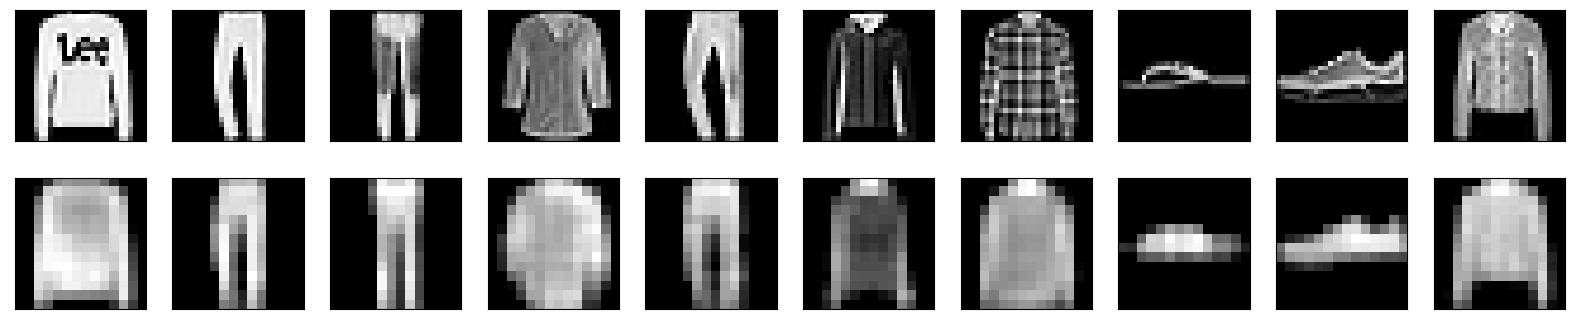

In [11]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

313/313 [==============================] - 3s 10ms/step


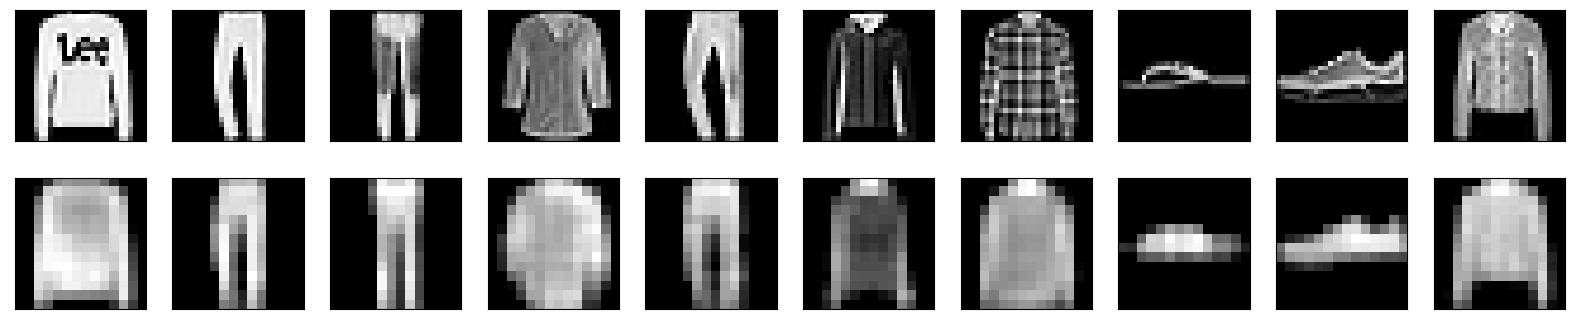

In [12]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()